<a href="https://colab.research.google.com/github/NguyenTanTan/Bai-tap-python/blob/python/%C4%90%E1%BB%93_%C3%A1n_ph%C3%A2n_t%C3%ADnh_th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân tích thống kê mô tả

Phân tích thống kê mô tả tập dữ liệu khảo sát chất lượng đời sống gia đình của các hộ dân

Mô tả các cột dữ liệu thu thập

Lấy dữ liệu phân tích thống kê mô tả

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dữ liệu/Inc_Exp_Data.csv')

In [4]:
df.head(10) # đơn vị nghìn đồng

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [ ]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [ ]:
df.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [ ]:
def drawn_boxplot(data):
  fig=plt.figure() # Tạo figure .
  ax=fig.add_subplot() # Tạo axes để vẽ đồ thị các hàm 
  ax=data.plot.box()
  ax.set_title("Biểu đồ Box Plot")

In [ ]:
def drawn_relation (data,name_col_1,name_col_2): # name_col_1:  quantitative data , name_col_2: qualitative data
  a=data.groupby(name_col_1)[name_col_2].mean()
  a=a.sort_values()
  ax=a.plot.bar(color='skyblue')
  ax.set_title(f"The gain of {name_col_2} depends on {name_col_1} \n (Mean)")
  ax.set_xlabel(name_col_1)
  ax.set_ylabel(name_col_2)

In [ ]:
def drawn_pie(data,title):
  fre_data=data.value_counts()
  fig1=plt.figure(figsize=(8,8))
  ax1=fig1.add_subplot()
  ax1.pie(fre_data, labels=fre_data.index,
          colors=np.random.choice(('g','r','c','m','y','k','cyan','skyblue','lightpink'),size=len(fre_data),replace=False) 
          ,autopct='%.1f%%',shadow=True, startangle=90)
  ax1.set_title(title,color='r')
  plt.show()


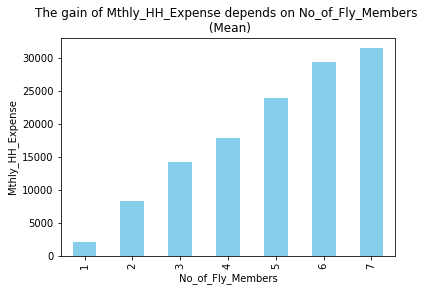

In [ ]:
drawn_relation(df,'No_of_Fly_Members','Mthly_HH_Expense')

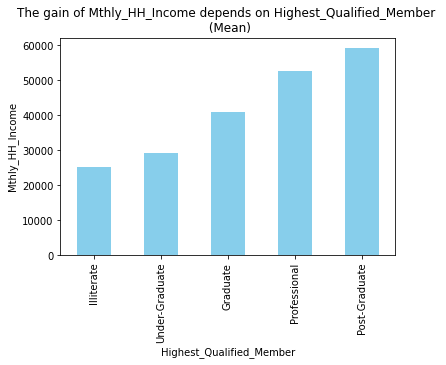

In [ ]:
drawn_relation(df,'Highest_Qualified_Member','Mthly_HH_Income')

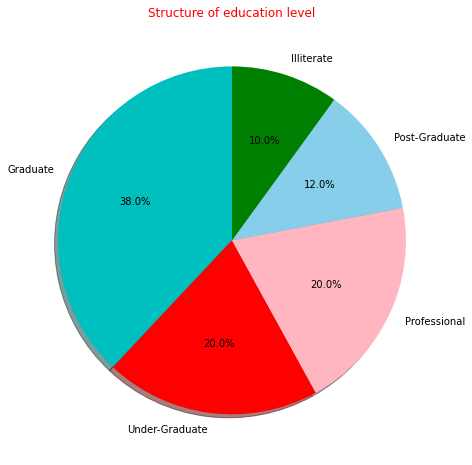

In [ ]:
drawn_pie(df['Highest_Qualified_Member'],'Structure of education level')

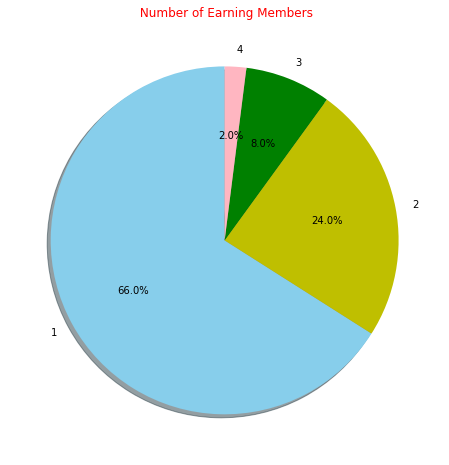

In [ ]:
drawn_pie(df['No_of_Earning_Members'],' Number of Earning Members')

 Hãy tạo hàm cho các thao tác phân tích , như vậy sẽ dễ dàng và thuận tiện hơn
 có chú thích


Hãy tạo biểu đồ thể hiện sự liên quan giữa 	Highest_Qualified_Member với Mthly_HH_Income và Mthly_HH_Expense

Vẽ biều đồ scatter

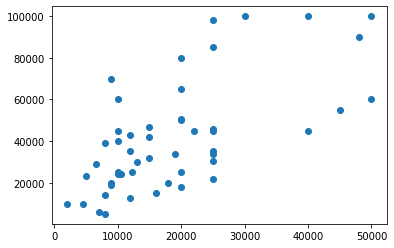

In [ ]:
plt.scatter(df['Mthly_HH_Expense'],df['Mthly_HH_Income'])
plt.show()

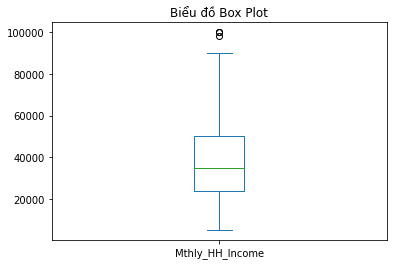

In [ ]:
drawn_boxplot(df['Mthly_HH_Income'])

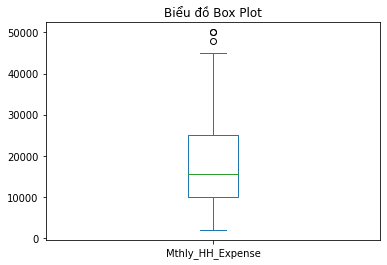

In [ ]:
drawn_boxplot(df['Mthly_HH_Expense'])